ESMI NUR FITRI (A12.2019.06175) - UAS AMS

Pada sebuah jurnal dengan judul Klasifikasi Dokumen Menggunakan Kombinasi Algoritma Principal Componen Analysis Dan SVM [11] yang memiliki tujuan untuk menemukan hyperplane terbaik yang memisahkan dua buah class pada input space menghasilkan bahwa pengujian  sistem  menggunakan  data  yang  direduksi  oleh Principal  Component  Analysis (PCA)  memiliki akurasi yang sedikit lebih rendah untuk dataset tertentu dibandingkan tanpa menggunakan PCA. penelitian tersebut memiliki nilai akurasi terbaik  dari  metode  SVM  yaitu sebesar 98.95%,  sedangkan  untuk  metode  SVM  +  PCA akurasi yang diperolehsebesar 96.78%. Dengan acuan penelitian tersebut, diharapkan penelitian ini dapat menghasilkan keluaran dengan nilai akurasi yang optimal.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks')


#install library ekphrasis

In [ ]:
!pip install ekphrasis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Proses Penataan Data dengan memanfaatkan library ekprasis
from ekphrasis.classes.preprocessor import TextPreProcessor
from ekphrasis.classes.tokenizer import SocialTokenizer
from ekphrasis.dicts.emoticons import emoticons

text_processor = TextPreProcessor(
    # terms that will be normalized
    normalize=['email', 'percent', 'money', 'phone', 'user',
        'time', 'date', 'number'],
    # terms that will be annotated
    #annotate={"hashtag", "allcaps", "elongated", "repeated",'emphasis', 'censored'},
    annotate={"hashtag","allcaps","elongated","repeated",'emphasis','censored'},
    fix_html=True,  # fix HTML tokens
    
    # corpus from which the word statistics are going to be used 
    # for word segmentation 
    segmenter="twitter", 
    
    # corpus from which the word statistics are going to be used 
    # for spell correction
    corrector="twitter", 
    
    unpack_hashtags=True,  # perform word segmentation on hashtags
    unpack_contractions=True,  # Unpack contractions (can't -> can not)
    spell_correct_elong=False,  # spell correction for elongated words
    
    # select a tokenizer. You can use SocialTokenizer, or pass your own
    # the tokenizer, should take as input a string and return a list of tokens
    tokenizer=SocialTokenizer(lowercase=True).tokenize,
    
    # list of dictionaries, for replacing tokens extracted from the text,
    # with other expressions. You can pass more than one dictionaries.
    dicts=[emoticons]
)

Reading twitter - 1grams ...
Reading twitter - 2grams ...
Reading twitter - 1grams ...


#Load Library

In [ ]:
import re
import string 
import pandas as pd
from copy import deepcopy

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

#Load dataset mentah

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/subsidi_kendaraan.csv', encoding=('ISO-8859-1'), low_memory=False, sep=';')  

#cek info

In [ ]:
df.head()

,Tweets,Label
0,Pemerintah RI berencana memberikan subsidi unt...,1
1,"Kata Presiden Jokowi, subsidi mobil listrik Rp...",1
2,Pengamat Kritik Subsidi Kendaraan Listrik Samp...,0
3,Alasan Jokowi Beri Subsidi Rp80 Juta untuk Pem...,1
4,Joko Widodo Jadinya Bersuara Soal Subsidi Beli...,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweets  211 non-null    object
 1   Label   211 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.4+ KB


#Preprocessing



####1. Case Folding, merupakan proses untuk mengkonversi teks ke dalam format huruf kecil (lowercase). Hal ini bertujuan untuk memberikan bentuk standar pada teks. Selain itu, pada tahap ini juga dapat menghaspus nomor, karakter, dan tanda baca yang tidak relevan dengan apa yang akan dianalisa.


####2. Cleansing, yaitu proses membersihkan dokumen dan menyeleksi kata yang tidak diperlukan seperti html, emoticon, hashtag, mention dan url.



##setting fungsi

In [ ]:
#membersihkan data dengan menghilangkan emoji, rt, mention, dll
def bersih_data(text):
    return " ".join(text_processor.pre_process_doc(text))

def non_ascii(text):
    return text.encode('ascii', 'replace').decode('ascii')

def remove_space_alzami(text):
    return " ".join(text.split())

def remove_emoji_alzami(text):
    return ' '.join(re.sub("([x#][A-Za-z0-9]+)"," ", text).split())

def remove_tab(text):
    return text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")

def remove_tab2(text):
    return re.sub('\s+',' ',text)

def remove_rt(text):
    return text.replace('RT'," ")

def remove_mention(text):
    return ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())

def remove_incomplete_url(text):
    return text.replace("http://", " ").replace("https://", " ")

def remove_single_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

def change_stripe(text):
    return text.replace('-'," ")

def lower(text):
    return text.lower()

def remove_punctuation(text):
    remove = string.punctuation
    remove = remove.replace("_", "") # don't remove hyphens
    pattern = r"[{}]".format(remove) # create the pattern
    return re.sub(pattern, "", text) 

##running preprocessing

In [ ]:
final_string = []
for text in df['Tweets'].values:
    EachReviewText = ""
    proc = bersih_data(text)
    proc = remove_rt(proc) 
    proc = lower(proc)
    proc = change_stripe(proc)
    proc = remove_tab(proc)
    proc = remove_tab2(proc)
    proc = non_ascii(proc)
    proc = remove_incomplete_url(proc)
    proc = remove_single_char(proc)
    proc = remove_punctuation(proc)
    proc = remove_space_alzami(proc)
    EachReviewText = proc
    final_string.append(EachReviewText)

In [ ]:
df["step01"] = final_string

In [ ]:
df.head()

,Tweets,Label,step01
0,Pemerintah RI berencana memberikan subsidi unt...,1,pemerintah ri berencana memberikan subsidi unt...
1,"Kata Presiden Jokowi, subsidi mobil listrik Rp...",1,kata presiden jokowi subsidi mobil listrik rp8...
2,Pengamat Kritik Subsidi Kendaraan Listrik Samp...,0,pengamat kritik subsidi kendaraan listrik samp...
3,Alasan Jokowi Beri Subsidi Rp80 Juta untuk Pem...,1,alasan jokowi beri subsidi rp80 juta untuk pem...
4,Joko Widodo Jadinya Bersuara Soal Subsidi Beli...,1,joko widodo jadinya bersuara soal subsidi beli...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweets  211 non-null    object
 1   Label   211 non-null    int64 
 2   step01  211 non-null    object
dtypes: int64(1), object(2)
memory usage: 5.1+ KB


##hapus record yang kosong

In [ ]:
df_hapus = df[~df['step01'].str.contains(" ")]

In [ ]:
df_new = df[~df.isin(df_hapus)].dropna()

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 211 entries, 0 to 210
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweets  211 non-null    object
 1   Label   211 non-null    int64 
 2   step01  211 non-null    object
dtypes: int64(1), object(2)
memory usage: 6.6+ KB


##Normalisasi Kata Slang dan Tokenisasi

Tokenisasi adalah proses untuk membagi atau memecah teks yang dapat berupa kalimat, paragraf atau dokumen, menjadi token atau bagian tertentu seperti kumpulan kata dengan cara menghilangkan tanda baca atau mengubah huruf  capital menjadi huruf kecil (lower case).

In [ ]:
# token
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
def word_tokenize_wrapper(text):
  return word_tokenize(text)

In [ ]:
#memisahkan teks menjadi token-token
df_new['tokens'] = df['step01'].apply(word_tokenize_wrapper)

In [ ]:
df_new.head(100)

,Tweets,Label,step01,tokens
0,Pemerintah RI berencana memberikan subsidi unt...,1,pemerintah ri berencana memberikan subsidi unt...,"[pemerintah, ri, berencana, memberikan, subsid..."
1,"Kata Presiden Jokowi, subsidi mobil listrik Rp...",1,kata presiden jokowi subsidi mobil listrik rp8...,"[kata, presiden, jokowi, subsidi, mobil, listr..."
2,Pengamat Kritik Subsidi Kendaraan Listrik Samp...,0,pengamat kritik subsidi kendaraan listrik samp...,"[pengamat, kritik, subsidi, kendaraan, listrik..."
3,Alasan Jokowi Beri Subsidi Rp80 Juta untuk Pem...,1,alasan jokowi beri subsidi rp80 juta untuk pem...,"[alasan, jokowi, beri, subsidi, rp80, juta, un..."
4,Joko Widodo Jadinya Bersuara Soal Subsidi Beli...,1,joko widodo jadinya bersuara soal subsidi beli...,"[joko, widodo, jadinya, bersuara, soal, subsid..."
...,...,...,...,...
95,"@ridwankamil Sejawa barat,atau sebandung raya....",1,user sejawa barat atau sebandung raya repeated...,"[user, sejawa, barat, atau, sebandung, raya, r..."
96,@detikcom Mending subsidi PLN saja. Kalo 400 r...,0,user mending subsidi allcaps pln allcaps saja ...,"[user, mending, subsidi, allcaps, pln, allcaps..."
97,Subsidi Kendaraan Listrik Jadi Beban Keuangan ...,0,subsidi kendaraan listrik jadi beban keuangan ...,"[subsidi, kendaraan, listrik, jadi, beban, keu..."
98,Pemerintah diminta mempertimbangkan secara mat...,0,pemerintah diminta mempertimbangkan secara mat...,"[pemerintah, diminta, mempertimbangkan, secara..."


In [ ]:
normalized_word = pd.read_excel("/content/drive/My Drive/Colab Notebooks/kamus perbaikan kata.xlsx")

normalized_word_dict = {}

for index, row in normalized_word.iterrows():
    if row[0] not in normalized_word_dict:
        normalized_word_dict[row[0]] = row[1] 

def normalized_term(document):
    return [normalized_word_dict[term] if term in normalized_word_dict else term for term in document]

df_new['tokens_perbaikan'] = df_new['tokens'].apply(normalized_term)

In [ ]:
df_new.head()

,Tweets,Label,step01,tokens,tokens_perbaikan
0,Pemerintah RI berencana memberikan subsidi unt...,1,pemerintah ri berencana memberikan subsidi unt...,"[pemerintah, ri, berencana, memberikan, subsid...","[pemerintah, di, berencana, memberikan, subsid..."
1,"Kata Presiden Jokowi, subsidi mobil listrik Rp...",1,kata presiden jokowi subsidi mobil listrik rp8...,"[kata, presiden, jokowi, subsidi, mobil, listr...","[kata, presiden, jokowi, subsidi, mobil, listr..."
2,Pengamat Kritik Subsidi Kendaraan Listrik Samp...,0,pengamat kritik subsidi kendaraan listrik samp...,"[pengamat, kritik, subsidi, kendaraan, listrik...","[pengamat, kritik, subsidi, kendaraan, listrik..."
3,Alasan Jokowi Beri Subsidi Rp80 Juta untuk Pem...,1,alasan jokowi beri subsidi rp80 juta untuk pem...,"[alasan, jokowi, beri, subsidi, rp80, juta, un...","[alasan, jokowi, beri, subsidi, rp80, juta, un..."
4,Joko Widodo Jadinya Bersuara Soal Subsidi Beli...,1,joko widodo jadinya bersuara soal subsidi beli...,"[joko, widodo, jadinya, bersuara, soal, subsid...","[joko, widodo, jadinya, bersuara, soal, subsid..."


In [ ]:
#menyeleksi data pada index ke 0
df_new.iloc[0].tokens

['pemerintah',
 'ri',
 'berencana',
 'memberikan',
 'subsidi',
 'untuk',
 'pembelian',
 'mobil',
 'listrik',
 'namun',
 'tidak',
 'semua',
 'mobil',
 'listrik',
 'akan',
 'men',
 'cofzqo2wcaif']

In [ ]:
df_new.iloc[0].tokens_perbaikan

['pemerintah',
 'di',
 'berencana',
 'memberikan',
 'subsidi',
 'untuk',
 'pembelian',
 'mobil',
 'listrik',
 'namun',
 'tidak',
 'semua',
 'mobil',
 'listrik',
 'akan',
 'men',
 'cofzqo2wcaif']

##Stopword - Menggunakan Modul NLTK

Stopword adalah tahap untuk mengurangi jumlah kata yang harus diproses dimana kata yang ada akan dicocokan dengan array stoplist yang ada, apabila    token yang dicek merupakan stoplist makatoken akan dihapus, apabila token  bukan termasuk stoplist maka token akan dibiarkan tetap ada.

In [ ]:
#menghilangkan kata kata tdk penting
from nltk.corpus import stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stopword = nltk.corpus.stopwords.words('indonesian')

def remove_stopwords(text):
  text = [word for word in text if word not in stopword]
  return text

df_new['Stop_removal'] = df_new['tokens_perbaikan'].apply(lambda x: remove_stopwords(x))
df_new

,Tweets,Label,step01,tokens,tokens_perbaikan,Stop_removal
0,Pemerintah RI berencana memberikan subsidi unt...,1,pemerintah ri berencana memberikan subsidi unt...,"[pemerintah, ri, berencana, memberikan, subsid...","[pemerintah, di, berencana, memberikan, subsid...","[pemerintah, berencana, subsidi, pembelian, mo..."
1,"Kata Presiden Jokowi, subsidi mobil listrik Rp...",1,kata presiden jokowi subsidi mobil listrik rp8...,"[kata, presiden, jokowi, subsidi, mobil, listr...","[kata, presiden, jokowi, subsidi, mobil, listr...","[presiden, jokowi, subsidi, mobil, listrik, rp..."
2,Pengamat Kritik Subsidi Kendaraan Listrik Samp...,0,pengamat kritik subsidi kendaraan listrik samp...,"[pengamat, kritik, subsidi, kendaraan, listrik...","[pengamat, kritik, subsidi, kendaraan, listrik...","[pengamat, kritik, subsidi, kendaraan, listrik..."
3,Alasan Jokowi Beri Subsidi Rp80 Juta untuk Pem...,1,alasan jokowi beri subsidi rp80 juta untuk pem...,"[alasan, jokowi, beri, subsidi, rp80, juta, un...","[alasan, jokowi, beri, subsidi, rp80, juta, un...","[alasan, jokowi, subsidi, rp80, juta, pembelia..."
4,Joko Widodo Jadinya Bersuara Soal Subsidi Beli...,1,joko widodo jadinya bersuara soal subsidi beli...,"[joko, widodo, jadinya, bersuara, soal, subsid...","[joko, widodo, jadinya, bersuara, soal, subsid...","[joko, widodo, bersuara, subsidi, beli, mobil,..."
...,...,...,...,...,...,...
206,Kalau aja @gojekindonesia bikin kategori khusu...,1,kalau aja user bikin kategori khusus goride el...,"[kalau, aja, user, bikin, kategori, khusus, go...","[kalau, saja, user, membuat, kategori, khusus,...","[user, kategori, khusus, goride, electric, har..."
207,RT @aldialdi00: @wbpratama Menurutku sih ya da...,0,rt user user menurutku sih ya daripada subsidi...,"[rt, user, user, menurutku, sih, ya, daripada,...","[rt, user, user, menurutku, sih, ya, daripada,...","[rt, user, user, menurutku, sih, ya, subsidi, ..."
208,@VIVAcoid Kalau alasannya krna harga beras dri...,0,user kalau alasannya krna harga beras dri peta...,"[user, kalau, alasannya, krna, harga, beras, d...","[user, kalau, alasannya, karena, harga, beras,...","[user, alasannya, harga, beras, petani, mahal,..."
209,Di negara Asia juga lagi semangat-semangatnya ...,1,di negara asia juga lagi semangat semangatnya ...,"[di, negara, asia, juga, lagi, semangat, seman...","[di, negara, asia, juga, lagi, semangat, seman...","[negara, asia, semangat, semangatnya, promosii..."


In [ ]:
df_new.iloc[1].tokens_perbaikan

['kata',
 'presiden',
 'jokowi',
 'subsidi',
 'mobil',
 'listrik',
 'rp80',
 'juta',
 'bisa',
 'tingkatkan',
 'penerimaan',
 'negara',
 'bukan',
 'pajak',
 'coxhykntxs6x']

In [ ]:
df_new.iloc[1].Stop_removal

['presiden',
 'jokowi',
 'subsidi',
 'mobil',
 'listrik',
 'rp80',
 'juta',
 'tingkatkan',
 'penerimaan',
 'negara',
 'pajak',
 'coxhykntxs6x']

In [ ]:
#yang awalnya berbentuk token, maka akan digabung lagi menjadi bentuk dokumen
i=0
final_string_tokens = []
for text in df_new['Stop_removal'].values:
    EachReviewText = ""
    EachReviewText = ' '.join(text)
    final_string_tokens.append(EachReviewText)

In [ ]:
df_new["step02"] = final_string_tokens

In [ ]:
df_new.head()

,Tweets,Label,step01,tokens,tokens_perbaikan,Stop_removal,step02
0,Pemerintah RI berencana memberikan subsidi unt...,1,pemerintah ri berencana memberikan subsidi unt...,"[pemerintah, ri, berencana, memberikan, subsid...","[pemerintah, di, berencana, memberikan, subsid...","[pemerintah, berencana, subsidi, pembelian, mo...",pemerintah berencana subsidi pembelian mobil l...
1,"Kata Presiden Jokowi, subsidi mobil listrik Rp...",1,kata presiden jokowi subsidi mobil listrik rp8...,"[kata, presiden, jokowi, subsidi, mobil, listr...","[kata, presiden, jokowi, subsidi, mobil, listr...","[presiden, jokowi, subsidi, mobil, listrik, rp...",presiden jokowi subsidi mobil listrik rp80 jut...
2,Pengamat Kritik Subsidi Kendaraan Listrik Samp...,0,pengamat kritik subsidi kendaraan listrik samp...,"[pengamat, kritik, subsidi, kendaraan, listrik...","[pengamat, kritik, subsidi, kendaraan, listrik...","[pengamat, kritik, subsidi, kendaraan, listrik...",pengamat kritik subsidi kendaraan listrik rp80...
3,Alasan Jokowi Beri Subsidi Rp80 Juta untuk Pem...,1,alasan jokowi beri subsidi rp80 juta untuk pem...,"[alasan, jokowi, beri, subsidi, rp80, juta, un...","[alasan, jokowi, beri, subsidi, rp80, juta, un...","[alasan, jokowi, subsidi, rp80, juta, pembelia...",alasan jokowi subsidi rp80 juta pembelian mobi...
4,Joko Widodo Jadinya Bersuara Soal Subsidi Beli...,1,joko widodo jadinya bersuara soal subsidi beli...,"[joko, widodo, jadinya, bersuara, soal, subsid...","[joko, widodo, jadinya, bersuara, soal, subsid...","[joko, widodo, bersuara, subsidi, beli, mobil,...",joko widodo bersuara subsidi beli mobil listri...


##Stemming - Menggunakan Sastrawi

Stemming digunakan untuk memeriksa relevannya beberapa dokumen  dibutuhkan proses stemming. Stemming adalah di mana proses pemetaan kata pada kalimat berimbuhan menjadi kata asli (tanpa kata imbuhan awalan, akhiran,  sisipan,kombinasi) yang di jalankan algoritma tertentu.

In [ ]:
!pip install sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 5.2 MB/s 


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [ ]:
final_string = []
s = ""
for sentence in df_new["step02"].values:
    filteredSentence = []
    EachReviewText = ""
    s = (stemmer.stem(sentence))
    filteredSentence.append(s)
    
    EachReviewText = ' '.join(filteredSentence)
    final_string.append(EachReviewText)

In [ ]:
df_new["ProcessedText"] = final_string

In [ ]:
df_new.head(5)

,Tweets,Label,step01,tokens,tokens_perbaikan,Stop_removal,step02,ProcessedText
0,Pemerintah RI berencana memberikan subsidi unt...,1,pemerintah ri berencana memberikan subsidi unt...,"[pemerintah, ri, berencana, memberikan, subsid...","[pemerintah, di, berencana, memberikan, subsid...","[pemerintah, berencana, subsidi, pembelian, mo...",pemerintah berencana subsidi pembelian mobil l...,perintah rencana subsidi beli mobil listrik mo...
1,"Kata Presiden Jokowi, subsidi mobil listrik Rp...",1,kata presiden jokowi subsidi mobil listrik rp8...,"[kata, presiden, jokowi, subsidi, mobil, listr...","[kata, presiden, jokowi, subsidi, mobil, listr...","[presiden, jokowi, subsidi, mobil, listrik, rp...",presiden jokowi subsidi mobil listrik rp80 jut...,presiden jokowi subsidi mobil listrik rp80 jut...
2,Pengamat Kritik Subsidi Kendaraan Listrik Samp...,0,pengamat kritik subsidi kendaraan listrik samp...,"[pengamat, kritik, subsidi, kendaraan, listrik...","[pengamat, kritik, subsidi, kendaraan, listrik...","[pengamat, kritik, subsidi, kendaraan, listrik...",pengamat kritik subsidi kendaraan listrik rp80...,amat kritik subsidi kendara listrik rp80 juta ...
3,Alasan Jokowi Beri Subsidi Rp80 Juta untuk Pem...,1,alasan jokowi beri subsidi rp80 juta untuk pem...,"[alasan, jokowi, beri, subsidi, rp80, juta, un...","[alasan, jokowi, beri, subsidi, rp80, juta, un...","[alasan, jokowi, subsidi, rp80, juta, pembelia...",alasan jokowi subsidi rp80 juta pembelian mobi...,alas jokowi subsidi rp80 juta beli mobil listr...
4,Joko Widodo Jadinya Bersuara Soal Subsidi Beli...,1,joko widodo jadinya bersuara soal subsidi beli...,"[joko, widodo, jadinya, bersuara, soal, subsid...","[joko, widodo, jadinya, bersuara, soal, subsid...","[joko, widodo, bersuara, subsidi, beli, mobil,...",joko widodo bersuara subsidi beli mobil listri...,joko widodo suara subsidi beli mobil listrik r...


##simpan hasil preprocessing

In [ ]:
df_new.to_csv('/content/drive/My Drive/Colab Notebooks/clean_dataset_partBanyak.csv', sep=";")

##load TF-IDF

Term weighting adalah suatu proses pembobotan setiap kata agar bisa mengoptimalkan kemampuan analisis sentimen pada proses text mining. Term   Frequency memiliki proporsi kepentingan sesuai  total kemunculannya dalam   teks atau dokumen. Inverse Document Frequency  (IDF) merupakan metode  pembobotan token yang berfungsi untuk memonitor kemunculan token dalam himpunan teks.

##cek emosi positive

In [ ]:
positive_reviews.head()

,Tweets,Label,step01,tokens,tokens_perbaikan,Stop_removal,step02,ProcessedText
0,Pemerintah RI berencana memberikan subsidi unt...,1,pemerintah ri berencana memberikan subsidi unt...,"[pemerintah, ri, berencana, memberikan, subsid...","[pemerintah, di, berencana, memberikan, subsid...","[pemerintah, berencana, subsidi, pembelian, mo...",pemerintah berencana subsidi pembelian mobil l...,perintah rencana subsidi beli mobil listrik mo...
1,"Kata Presiden Jokowi, subsidi mobil listrik Rp...",1,kata presiden jokowi subsidi mobil listrik rp8...,"[kata, presiden, jokowi, subsidi, mobil, listr...","[kata, presiden, jokowi, subsidi, mobil, listr...","[presiden, jokowi, subsidi, mobil, listrik, rp...",presiden jokowi subsidi mobil listrik rp80 jut...,presiden jokowi subsidi mobil listrik rp80 jut...
3,Alasan Jokowi Beri Subsidi Rp80 Juta untuk Pem...,1,alasan jokowi beri subsidi rp80 juta untuk pem...,"[alasan, jokowi, beri, subsidi, rp80, juta, un...","[alasan, jokowi, beri, subsidi, rp80, juta, un...","[alasan, jokowi, subsidi, rp80, juta, pembelia...",alasan jokowi subsidi rp80 juta pembelian mobi...,alas jokowi subsidi rp80 juta beli mobil listr...
4,Joko Widodo Jadinya Bersuara Soal Subsidi Beli...,1,joko widodo jadinya bersuara soal subsidi beli...,"[joko, widodo, jadinya, bersuara, soal, subsid...","[joko, widodo, jadinya, bersuara, soal, subsid...","[joko, widodo, bersuara, subsidi, beli, mobil,...",joko widodo bersuara subsidi beli mobil listri...,joko widodo suara subsidi beli mobil listrik r...
5,Pemerintah juga sudah melakukan kajian dan men...,1,pemerintah juga sudah melakukan kajian dan men...,"[pemerintah, juga, sudah, melakukan, kajian, d...","[pemerintah, juga, sudah, melakukan, kajian, d...","[pemerintah, kajian, mengkalkulasi, kebijakan,...",pemerintah kajian mengkalkulasi kebijakan dija...,perintah kaji kalkulasi bijak jalan co1lzqllyady


In [ ]:
Positive_1_tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
Positive_1_tf_idf = Positive_1_tf_idf_vect.fit_transform(positive_reviews["ProcessedText"].values)

In [ ]:
Positive_1_tf_idf.shape

(104, 874)

In [ ]:
features = Positive_1_tf_idf_vect.get_feature_names()

idfValues = Positive_1_tf_idf_vect.idf_

d = dict(zip(features, 9 - idfValues))

sortedDict = sorted(d.items(), key = lambda d: d[1], reverse = True)

for i in range(200):
    print(sortedDict[i])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


('listrik', 7.834676019574617)
('subsidi', 7.520426919738114)
('kendara', 7.258062655270622)
('kendara listrik', 7.217240660750368)
('user', 7.107239765536039)
('mobil', 7.059611716546785)
('mobil listrik', 6.811775552642203)
('rt', 6.747237031504632)
('rt user', 6.747237031504632)
('insentif', 6.641876515846805)
('juta', 6.641876515846805)
('perintah', 6.604136187863959)
('beli', 6.524093480190422)
('rp80', 6.437082103200792)
('rp80 juta', 6.3905620875658995)
('motor', 6.179252993898693)
('allcaps', 6.0540898509446865)
('subsidi mobil', 5.985096979457735)
('insentif kendara', 5.910989007304013)
('motor listrik', 5.910989007304013)
('rencana', 5.910989007304013)
('subsidi kendara', 5.910989007304013)
('listrik rp80', 5.830946299630477)
('beli mobil', 5.743934922640847)
('subsidi rp80', 5.743934922640847)
('number', 5.648624742836523)
('beli kendara', 5.543264227178696)
('subsidi beli', 5.543264227178696)
('user perintah', 5.543264227178696)
('user subsidi', 5.543264227178696)
('rencana

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plot

In [ ]:
def PlotWordCloud(frequency):
    worcloudPlot = WordCloud(background_color="white", width=1500, height=1000)
    worcloudPlot.generate_from_frequencies(frequencies=frequency)
    plot.figure(figsize=(15,10))
    plot.imshow(worcloudPlot, interpolation="bilinear")
    plot.axis("off")
    plot.show()

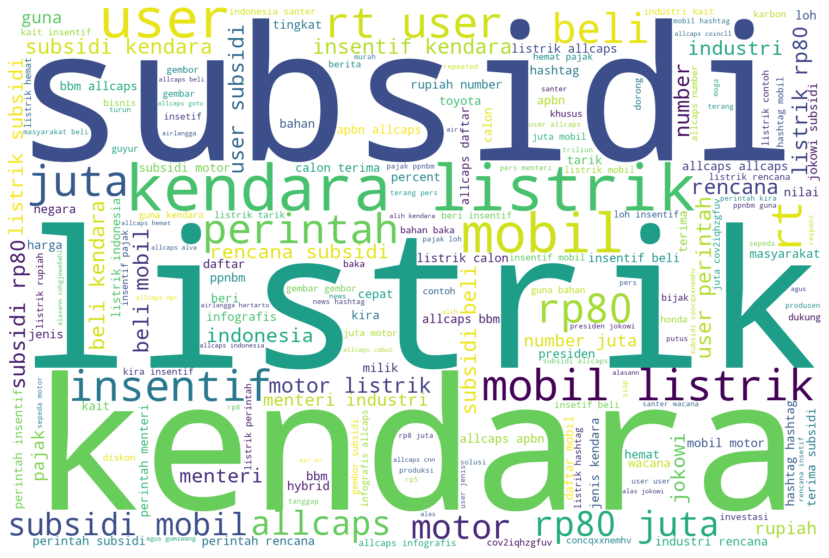

In [ ]:
PlotWordCloud(d)

##cek emosi negative

In [ ]:
negative_reviews = df_new[(df_new["Label"] == 0)]

In [ ]:
Negative_1_tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
Negative_1_tf_idf = Negative_1_tf_idf_vect.fit_transform(negative_reviews["ProcessedText"].values)

In [ ]:
Negative_1_tf_idf.shape

(107, 1242)

In [ ]:
features = Negative_1_tf_idf_vect.get_feature_names()

idfValues = Negative_1_tf_idf_vect.idf_

d = dict(zip(features, 9 - idfValues))

sortedDict = sorted(d.items(), key = lambda d: d[1], reverse = True)

for i in range(200):
    print(sortedDict[i])

('subsidi', 7.817678443206045)
('listrik', 7.661674194729464)
('user', 7.566364014925139)
('mobil', 7.146510169364875)
('rt', 6.955454932602166)
('rt user', 6.955454932602166)
('kendara', 6.928786685520005)
('kendara listrik', 6.783604675675507)
('allcaps', 6.751855977360926)
('mobil listrik', 6.751855977360926)
('motor', 6.536744597743981)
('beli', 6.495922603223725)
('subsidi mobil', 6.495922603223725)
('motor listrik', 6.151082116931996)
('subsidi kendara', 6.151082116931996)
('user user', 6.025918973977991)
('user subsidi', 5.956926102491039)
('subsidi motor', 5.882818130337316)
('bbm', 5.80277542266378)
('juta', 5.80277542266378)
('number', 5.80277542266378)
('insentif', 5.715764045674151)
('orang', 5.715764045674151)
('rakyat', 5.715764045674151)
('beli mobil', 5.620453865869826)
('perintah', 5.620453865869826)
('rp80', 5.620453865869826)
('rp80 juta', 5.620453865869826)
('subsidi allcaps', 5.620453865869826)
('harga', 5.515093350212)
('repeated', 5.515093350212)
('gas', 5.397310

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plot

In [ ]:
def PlotWordCloud(frequency):
    worcloudPlot = WordCloud(background_color="white", width=1500, height=1000)
    worcloudPlot.generate_from_frequencies(frequencies=frequency)
    plot.figure(figsize=(15,10))
    plot.imshow(worcloudPlot, interpolation="bilinear")
    plot.axis("off")
    plot.show()

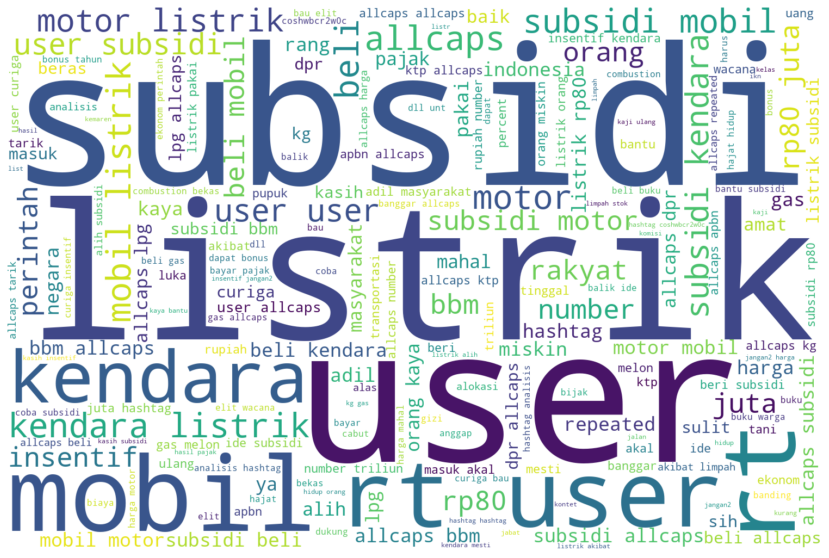

In [ ]:
PlotWordCloud(d)

##Cek emosi untuk Semua label

In [ ]:
tfidf_vect = TfidfVectorizer(ngram_range = (1,2))

In [ ]:
Data_TFIDF = tfidf_vect.fit_transform(df_new["ProcessedText"].values)

In [ ]:
Data_TFIDF.shape

(211, 1947)

In [ ]:
vectorizer = TfidfVectorizer(ngram_range = (1,2))

In [ ]:
X = vectorizer.fit_transform(df_new["ProcessedText"].values)

In [ ]:
print(X.shape)

(211, 1947)


In [ ]:
features = vectorizer.get_feature_names_out()

In [ ]:
features

array(['a241', 'a241 ta', 'abdullah', ..., 'yah subsidi', 'yahoo',
       'yahoo berita'], dtype=object)

In [ ]:
idfValues = vectorizer.idf_

In [ ]:
d = dict(zip(features, 9 - idfValues))

In [ ]:
sortedDict = sorted(d.items(), key = lambda d: d[1], reverse = True)

In [ ]:
for i in range(651):
    print(sortedDict[i])

('listrik', 7.749359199228568)
('subsidi', 7.680366327741616)
('user', 7.361912596623082)
('kendara', 7.097761021581496)
('mobil', 7.097761021581496)
('kendara listrik', 7.012861577795009)
('rt', 6.848106344718953)
('rt user', 6.848106344718953)
('mobil listrik', 6.770548110373079)
('beli', 6.493561327038046)
('allcaps', 6.450076215098307)
('motor', 6.356985792032296)
('juta', 6.280999885054373)
('insentif', 6.2543316379722125)
('subsidi mobil', 6.2543316379722125)
('perintah', 6.198761786817402)
('rp80', 6.077400929813134)
('rp80 juta', 6.044611106990143)
('motor listrik', 6.010709555314461)
('subsidi kendara', 6.010709555314461)
('user subsidi', 5.734456178686303)
('number', 5.687936163051411)
('beli mobil', 5.639145998881979)
('listrik rp80', 5.533785483224152)
('user user', 5.476627069384204)
('bbm', 5.416002447567768)
('insentif kendara', 5.416002447567768)
('subsidi motor', 5.416002447567768)
('beli kendara', 5.351463926430197)
('rencana', 5.351463926430197)
('subsidi beli', 5.35

In [ ]:
def PlotWordCloud(frequency):
    worcloudPlot = WordCloud(background_color="white", width=1500, height=1000)
    worcloudPlot.generate_from_frequencies(frequencies=frequency)
    plot.figure(figsize=(15,10))
    plot.imshow(worcloudPlot, interpolation="bilinear")
    plot.axis("off")
    plot.show()

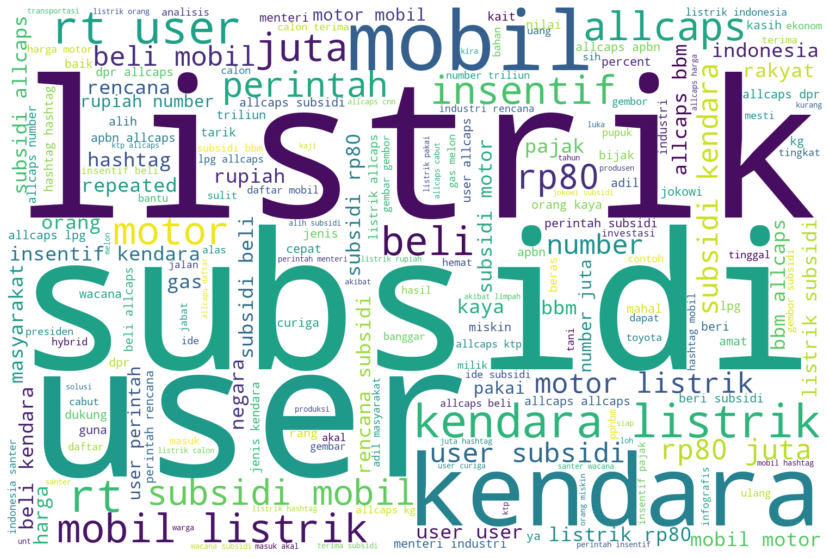

In [ ]:
PlotWordCloud(d)

#Penataan Data
Train-Test Split yaitu pembagian dataset menjadi testing set dan training set, atau dengan kata lain data yang dimanfaatkan pada tahapan training dan testing merupakan data set yang tidak sama. Metode pemisahan train-test akan menghasilkan nilai prediksi yang lebih tepat untuk data baru atau data yang belum dilatih. Data dalam eksperimen ini akan dibagi 90% untuk data training dan 10% untuk data testing. Proporsi pembagian akan menentukan seberapa baik kinerja model ketika dihadapkan pada data yang belum pernah dilihat sebelumnya. Pembagian data ini bertujuan untuk memisahkan data menjadi data test dan data train agar dapat dievaluasi lebih spesifik.


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/clean_dataset_partBanyak.csv', sep=";")

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        211 non-null    int64 
 1   Tweets            211 non-null    object
 2   Label             211 non-null    int64 
 3   step01            211 non-null    object
 4   tokens            211 non-null    object
 5   tokens_perbaikan  211 non-null    object
 6   Stop_removal      211 non-null    object
 7   step02            211 non-null    object
 8   ProcessedText     211 non-null    object
dtypes: int64(2), object(7)
memory usage: 15.0+ KB


In [ ]:
dataset_feature = dataset['ProcessedText'].astype(str)

In [ ]:
dataset_feature.head(10)

0    perintah rencana subsidi beli mobil listrik mo...
1    presiden jokowi subsidi mobil listrik rp80 jut...
2    amat kritik subsidi kendara listrik rp80 juta ...
3    alas jokowi subsidi rp80 juta beli mobil listr...
4    joko widodo suara subsidi beli mobil listrik r...
5     perintah kaji kalkulasi bijak jalan co1lzqllyady
6    user subsidi beli kendara model tukar co3e4hui...
7    rt user curiga bau elit wacana subsidi mobil l...
8    beli mobil listrik subsidi rp80 juta toyota su...
9    menperin subsidi mobil listrik rp80 juta putus...
Name: ProcessedText, dtype: object

In [ ]:
dataset_label = dataset['Label']

In [ ]:
dataset_label.head(10)

0    1
1    1
2    0
3    1
4    1
5    1
6    1
7    0
8    1
9    1
Name: Label, dtype: int64

##distribusi label

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


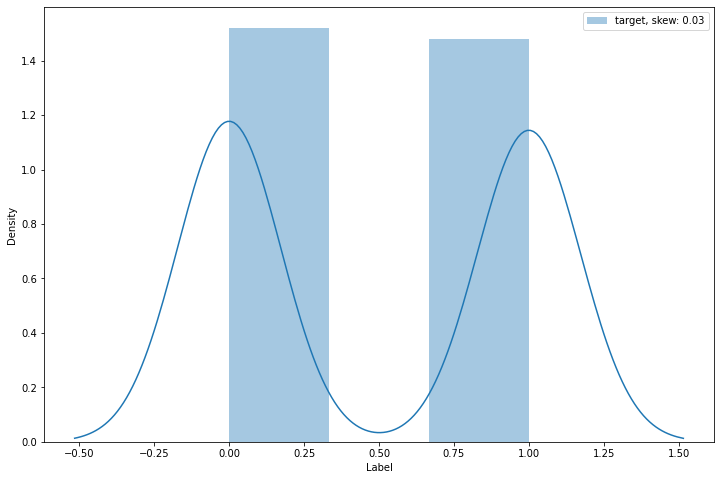

In [ ]:
# Visualizing the target variable
plt.figure(figsize=(12,8))
sns.distplot(dataset_label, label=f'target, skew: {dataset_label.skew():.2f}')
plt.legend(loc='best')
plt.show()

In [ ]:
dataset_label.value_counts()

0    107
1    104
Name: Label, dtype: int64

Kesimpulan dataset : Data yang digunakan dalam analisis ini memiliki 2 sentimen yaitu positif dan negatif dimana masing-masing distribusi data berjumlah 104 dan 107. dapat dilihat bahwa jumlah masing-masing label cukup seimbang dan tidak ada ketimpangan sehingga data cukup optimal untuk dilakukan pemodelan.

##Ekstraksi Fitur dan Machine Learning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split

In [ ]:
train_x, test_x, train_label, test_label = train_test_split(dataset_feature, dataset_label, test_size = 0.3, random_state=42)

In [ ]:
test_x

30     pegawai pajak makmur dapat bonus tahun hasil p...
173    user subsidi motor listrik alih jelas2 hajat h...
140    pajak karbon solusi salur insentif kendara lis...
75     orang kaya bantu subsidi mobil listrik orang m...
60       subsidi mobil listrik anggap desak comyalxwwtkz
                             ...                        
5       perintah kaji kalkulasi bijak jalan co1lzqllyady
170     user kait subsidi rp80 juta bg beli mobil hybrid
56     rt user amat mobil allcaps bbg allcaps subsidi...
98     perintah timbang matang matang kait beri subsi...
158    subsidi ringan pajak bumn tugasin mobil listri...
Name: ProcessedText, Length: 64, dtype: object

#Pemodelan


##Logistic Regresi
Logistic  regression, adalah  model  statistik  yang digunakan    untuk    menentukan    apakah    sebuah independent  variable  memiliki  pengaruh  terhadap sebuah binary dependent variable. Dengan menggunakan  sigmoid  function,  logistic  regression menghasilkan    output    sebuah    probability    antara angka 0 dan 1.

####Logistik Regresi

In [ ]:
train_x, test_x, train_label, test_label = train_test_split(dataset_feature, dataset_label, test_size = 0.1, random_state=42)

In [ ]:
import logging
import pandas as pd
import numpy as np
from numpy import random
import gensim
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup
%matplotlib inline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
classifier_lr = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('model', LogisticRegression())
])

In [ ]:
parameters_lr = {
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3), (1, 4)],
    'model__multi_class': ['auto', 'ovr', 'multinomial'],
    'model__C': np.logspace(-4,4,20),
    'model__solver' : ['lbfgs', 'liblinear', 'newton-cg']
}

In [ ]:
classifier_lr = GridSearchCV(classifier_lr, parameters_lr, cv = 3, verbose=1, n_jobs=-1)

In [ ]:
classifier_lr.fit(train_x, train_label)

Fitting 3 folds for each of 720 candidates, totalling 2160 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
240 fits failed out of a total of 2160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 1519, in fit
    multi_class = _check_multi_class(self.multi_class, solver, len

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('model', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'model__C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'model__multi_class': ['auto', 'ovr', 'multinomial'],
                         'model__solver': ['lbfgs', 'liblinear', 'newton-cg'],
                         'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3),
                                                (1, 4)]},
             verbose=1)

In [ ]:
#hasil sgdv training : 94, testing : 72
y_pred_lr_train = classifier_lr.predict(train_x)
accuracy_lr_train = accuracy_score(train_label, y_pred_lr_train)
print("Accuracy Training set: ", accuracy_lr_train)

y_pred_lr_test = classifier_lr.predict(test_x)
accuracy_lr_test = accuracy_score(test_label, y_pred_lr_test)
print("Accuracy Test set: ", accuracy_lr_test)

Accuracy Training set:  0.9523809523809523
Accuracy Test set:  0.8636363636363636


In [ ]:
recall_lr_train = recall_score(train_label, y_pred_lr_train, average='weighted')
print("Recall Training set: ", recall_lr_train)

recall_lr_test = recall_score(test_label, y_pred_lr_test, average='weighted')
print("Recall Test set: ", recall_lr_test)

Recall Training set:  0.9523809523809523
Recall Test set:  0.8636363636363636


In [ ]:
precision_lr_train = precision_score(train_label, y_pred_lr_train, average='weighted')
print("Precision Training set: ", precision_lr_train)

precision_lr_test = precision_score(test_label, y_pred_lr_test, average='weighted')
print("Precision Test set: ", precision_lr_test)

Precision Training set:  0.9528138528138529
Precision Test set:  0.8666666666666668


In [ ]:
f1_lr_train = f1_score(train_label, y_pred_lr_train, average='weighted')
print("F1 Training set: ", f1_lr_train)

f1_lr_test = f1_score(test_label, y_pred_lr_test, average='weighted')
print("F1 Test set: ", f1_lr_test)

F1 Training set:  0.9523569326848016
F1 Test set:  0.8633540372670807


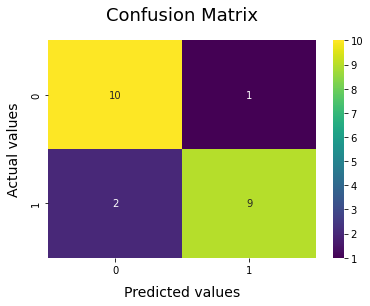

In [ ]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(test_label, y_pred_lr_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
plt.show()

In [ ]:
classifier_lr.best_estimator_

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('model', LogisticRegression(C=1.623776739188721))])

In [ ]:
for param_name in sorted(parameters_lr.keys()):
    print("%s: %r" % (param_name, classifier_lr.best_params_[param_name]))

model__C: 1.623776739188721
model__multi_class: 'auto'
model__solver: 'lbfgs'
tfidf__ngram_range: (1, 1)


In [ ]:
vectorizer8 = TfidfVectorizer(max_features = 111, lowercase = False, ngram_range = (1,1))
vec_train_data8 = vectorizer8.fit_transform(train_x).toarray()
vec_test_data8 = vectorizer8.fit_transform(test_x).toarray()

### PCA
PCA berfungsi untuk mengurangi dimensi data dengan mempertahankan sebanyak mungkin informasi dari dataset yang asli.
Proses Principal Component Analysis menghasilkan data awal dengan ekstraksi fitur, yaitu dengan cara mengurangi nilai rata-rata dari masing-masing dimensi data. Pada akhirnya proses ini akan menghasilkan kumpulan data yang memiliki rata-rata nol. Selanjutnya proses yang dilakukan adalah menghitung eigenvalue dan eigenvector dengan persamaan yang kemudian proses terakhir adalah mengurangi dimensi sebesar K. 


####Logistik Regresi + PCA

In [ ]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
training_feature_pca_2Dlr = pca.fit_transform(vec_train_data8)
test_feature_pca_2Dlr = pca.transform(vec_test_data8)

In [ ]:
classifier_lr = Pipeline([
    ('pca', PCA()),
    ('model', LogisticRegression())
])

In [ ]:
parameters_lr = {
     'pca__n_components' : [5, 10, 15, 20, 25],
     'model__multi_class': ['auto', 'ovr', 'multinomial'],
     'model__C': np.logspace(-4,4,20),
     'model__solver' : ['lbfgs', 'liblinear', 'newton-cg']
}

In [ ]:
classifier_lr = GridSearchCV(classifier_lr, parameters_lr, cv = 3, n_jobs=-1)

In [ ]:
classifier_lr.fit(vec_train_data8, train_label)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
300 fits failed out of a total of 2700.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
300 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 1519, in fit
    multi_class = _check_multi_class(self.multi_class, solver, len

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('model', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'model__C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'model__multi_class': ['auto', 'ovr', 'multinomial'],
                         'model__solver': ['lbfgs', 'liblinear', 'newton-cg'],
                         'pca__n_components': [5, 10, 15, 20, 25]})

In [ ]:
for param_name in sorted(parameters_lr.keys()):
    print("%s: %r" % (param_name, classifier_lr.best_params_[param_name]))

model__C: 0.08858667904100823
model__multi_class: 'auto'
model__solver: 'liblinear'
pca__n_components: 5


In [ ]:
# PCA
pca = PCA(n_components=25)
training_feature_pca_2D = pca.fit_transform(vec_train_data8)
test_feature_pca_2D = pca.transform(vec_test_data8)

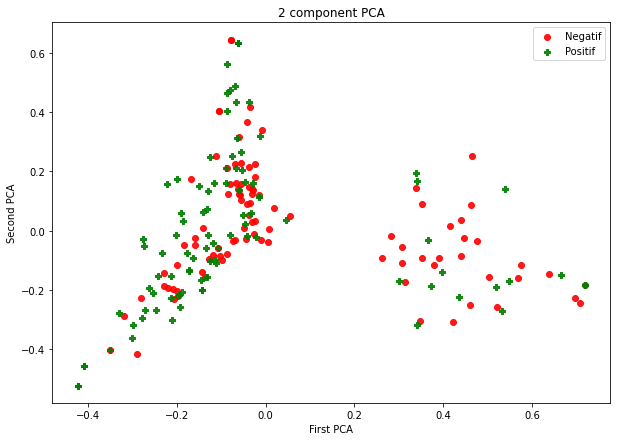

In [ ]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(1, 1, 1)
colors = ['r', 'g', 'b']
markers = ['o', 'P', 'v']
classes = np.sort(np.unique(train_label))
labels = ['Negatif', 'Positif']

for class_ix, marker, color, label in zip(classes, markers, colors, labels):
  ax.scatter(training_feature_pca_2Dlr[np.where(train_label == class_ix), 0],
             training_feature_pca_2Dlr[np.where(train_label == class_ix), 1],
             marker=marker, color=color,
             linewidth='1', alpha=0.9, label=label)
  ax.legend(loc='best')
plt.xlabel('First PCA')
plt.ylabel('Second PCA')
plt.title("2 component PCA")
plt.show()

In [ ]:
y_pred_lr_train_pca = classifier_lr.predict(vec_train_data8)
accuracy_lr_train_pca = accuracy_score(train_label, y_pred_lr_train_pca)
print("Accuracy Training set: ", accuracy_lr_train_pca)

y_pred_lr_test_pca = classifier_lr.predict(vec_test_data8)
accuracy_lr_test_pca = accuracy_score(test_label, y_pred_lr_test_pca)
print("Accuracy Test set: ", accuracy_lr_test_pca)

Accuracy Training set:  0.7248677248677249
Accuracy Test set:  0.7272727272727273


In [ ]:
recall_lr_train_pca = recall_score(train_label, y_pred_lr_train_pca, average='weighted')
print("Recall Training set: ", recall_lr_train_pca)

recall_lr_test_pca = recall_score(test_label, y_pred_lr_test_pca, average='weighted')
print("Recall Test set: ", recall_lr_test_pca)

Recall Training set:  0.7248677248677249
Recall Test set:  0.7272727272727273


In [ ]:
precision_lr_train_pca = precision_score(train_label, y_pred_lr_train_pca, average='weighted')
print("Precision Training set: ", precision_lr_train_pca)

precision_lr_test_pca = precision_score(test_label, y_pred_lr_test_pca, average='weighted')
print("Precision Test set: ", precision_lr_test_pca)

Precision Training set:  0.7292746634518785
Precision Test set:  0.735042735042735


In [ ]:
f1_lr_train_pca = f1_score(train_label, y_pred_lr_train_pca, average='weighted')
print("F1 Training set: ", f1_lr_train_pca)

f1_lr_test_pca = f1_score(test_label, y_pred_lr_test_pca, average='weighted')
print("F1 Test set: ", f1_lr_test_pca)

F1 Training set:  0.7230196360925646
F1 Test set:  0.7250000000000001


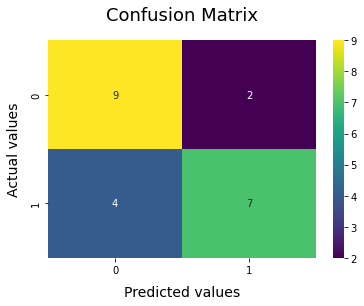

In [ ]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(test_label, y_pred_lr_test_pca), annot=True, cmap = 'viridis', fmt='.0f')
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
plt.show()

In [ ]:
training_feature_pca_2Dlr

array([[ 0.57441887, -0.11678794,  0.02195515, ...,  0.05467458,
        -0.03125849, -0.01788931],
       [-0.02167159, -0.02244523,  0.18903337, ..., -0.04767432,
         0.02411918,  0.01655679],
       [-0.06147887,  0.63438883, -0.2881176 , ..., -0.02774809,
         0.00193192, -0.03334131],
       ...,
       [ 0.43508871, -0.22442231, -0.11997483, ..., -0.02269339,
         0.06067641,  0.07939035],
       [-0.05572668,  0.15798408,  0.40853023, ...,  0.0038046 ,
        -0.05559177,  0.00460466],
       [ 0.31471181, -0.17233992, -0.03952767, ...,  0.12532318,
         0.05176227,  0.00600871]])

In [ ]:
models = [        
          ('Logistic Regression', accuracy_lr_train, accuracy_lr_test),
          ('Logistic Regression PCA', accuracy_lr_train_pca, accuracy_lr_test_pca)
         ]

In [ ]:
predict_lr = pd.DataFrame(data = models, columns=['Model', 'Training Accuracy', 'Test Accuracy'])
predict_lr

,Model,Training Accuracy,Test Accuracy
0,Logistic Regression,0.952381,0.863636
1,Logistic Regression PCA,0.724868,0.727273


##Linear SVM
Support Vector Machine merupakan sistem pembelajaran yang menggunakan hipotesis berupa fungsi-fungsi linear dalam sebuah fitur yang berdimensi tinggi dan dilatih dengan menggunakan algoritma pembelajaran yang didasarkan dengan teori optimasi. Tingkat akurasi pada model yang akan dihasilkan oleh proses peralihan pada svm sangat bergantung pada fungsi kernel dan parameter yang digunakan. Berdasarkan dengan karakteristiknya metode SVM dibagi menjadi dua yaitu linear dan non linear, SVM linear merupakan data yang dipisahkan secara linear yaitu memsiahkan dua kelas pada hyperplane dengan soft margin. Sedangkan non linear yaitu merupakan fungsi dari kernel trick terhadap ruang yang berdimensi tinggi. 

####SVM

In [ ]:
train_x, test_x, train_label, test_label = train_test_split(dataset_feature, dataset_label, test_size = 0.1, random_state=42)

In [ ]:
import logging
import pandas as pd
import numpy as np
from numpy import random
import gensim
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup
%matplotlib inline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
classifier_sgdc = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('model', SGDClassifier())
])

In [ ]:
parameters_sgdc = {
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3), (1, 4)],
    'model__alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3], # learning rate
    'model__loss': ['hinge', 'log', 'log_loss']
}

In [ ]:
classifier_sgdc = GridSearchCV(classifier_sgdc, parameters_sgdc, cv = 3, verbose=1, n_jobs=-1)

In [ ]:
classifier_sgdc.fit(train_x, train_label)

Fitting 3 folds for each of 96 candidates, totalling 288 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
96 fits failed out of a total of 288.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
96 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py", line 883, in fit
    return self._fit(
  File "/usr/local/lib/python3.8/dist

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('model', SGDClassifier())]),
             n_jobs=-1,
             param_grid={'model__alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0,
                                          100.0, 1000.0],
                         'model__loss': ['hinge', 'log', 'log_loss'],
                         'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3),
                                                (1, 4)]},
             verbose=1)

In [ ]:
#hasil sgdv training : 94, testing : 72
y_pred_sgdc_train = classifier_sgdc.predict(train_x)
accuracy_sgdc_train = accuracy_score(train_label, y_pred_sgdc_train)
print("Accuracy Training set: ", accuracy_sgdc_train)

y_pred_sgdc_test = classifier_sgdc.predict(test_x)
accuracy_sgdc_test = accuracy_score(test_label, y_pred_sgdc_test)
print("Accuracy Test set: ", accuracy_sgdc_test)

Accuracy Training set:  0.9047619047619048
Accuracy Test set:  0.8636363636363636


In [ ]:
recall_sgdc_train = recall_score(train_label, y_pred_sgdc_train, average='weighted')
print("Recall Training set: ", recall_sgdc_train)

recall_sgdc_test = recall_score(test_label, y_pred_sgdc_test, average='weighted')
print("Recall Test set: ", recall_sgdc_test)

Recall Training set:  0.9047619047619048
Recall Test set:  0.8636363636363636


In [ ]:
#hasil sgdv training : 94, testing : 76
precision_sgdc_train = precision_score(train_label, y_pred_sgdc_train, average='weighted')
print("Precision Training set: ", precision_sgdc_train)

precision_sgdc_test = precision_score(test_label, y_pred_sgdc_test, average='weighted')
print("Precision Test set: ", precision_sgdc_test)

Precision Training set:  0.9063073505264175
Precision Test set:  0.8666666666666668


In [ ]:
f1_sgdc_train = f1_score(train_label, y_pred_sgdc_train, average='weighted')
print("F1 Training set: ", f1_sgdc_train)

f1_sgdc_test = f1_score(test_label, y_pred_sgdc_test, average='weighted')
print("F1 Test set: ", f1_sgdc_test)

F1 Training set:  0.9046176046176047
F1 Test set:  0.8633540372670807


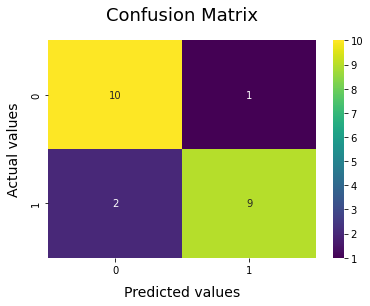

In [ ]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(test_label, y_pred_sgdc_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
plt.show()

In [ ]:
classifier_sgdc.best_estimator_

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('model', SGDClassifier(alpha=0.01))])

In [ ]:
for param_name in sorted(parameters_sgdc.keys()):
    print("%s: %r" % (param_name, classifier_sgdc.best_params_[param_name]))

model__alpha: 0.01
model__loss: 'hinge'
tfidf__ngram_range: (1, 1)


In [ ]:
vectorizer7 = TfidfVectorizer(max_features = 111, lowercase = False, ngram_range = (1,1))
vec_train_data7 = vectorizer7.fit_transform(train_x).toarray()
vec_test_data7 = vectorizer7.fit_transform(test_x).toarray()

####SVM + PCA

In [ ]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
training_feature_pca_2Dsgdc = pca.fit_transform(vec_train_data7)
test_feature_pca_2Dsgdc = pca.transform(vec_test_data7)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
classifier_sgdc = Pipeline([
    ('pca', PCA()),
    ('model', SGDClassifier())
])

In [ ]:
parameters_sgdc = {
    'pca__n_components' : [5, 10, 15, 20, 25],
    'model__alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3], # learning rate
    'model__loss': ['hinge', 'log', 'log_loss']
}

In [ ]:
classifier_sgdc = GridSearchCV(classifier_sgdc, parameters_sgdc, cv = 3, n_jobs=-1)

In [ ]:
classifier_sgdc.fit(vec_train_data7, train_label)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
120 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py", line 883, in fit
    return self._fit(
  File "/usr/local/lib/python3.8/di

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('model', SGDClassifier())]),
             n_jobs=-1,
             param_grid={'model__alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0,
                                          100.0, 1000.0],
                         'model__loss': ['hinge', 'log', 'log_loss'],
                         'pca__n_components': [5, 10, 15, 20, 25]})

In [ ]:
for param_name in sorted(parameters_sgdc.keys()):
    print("%s: %r" % (param_name, classifier_sgdc.best_params_[param_name]))

model__alpha: 0.1
model__loss: 'log'
pca__n_components: 10


In [ ]:
# PCA
pca = PCA(n_components=20)
training_feature_pca_2Dsgdc = pca.fit_transform(vec_train_data7)
test_feature_pca_2Dsgdc = pca.transform(vec_test_data7)

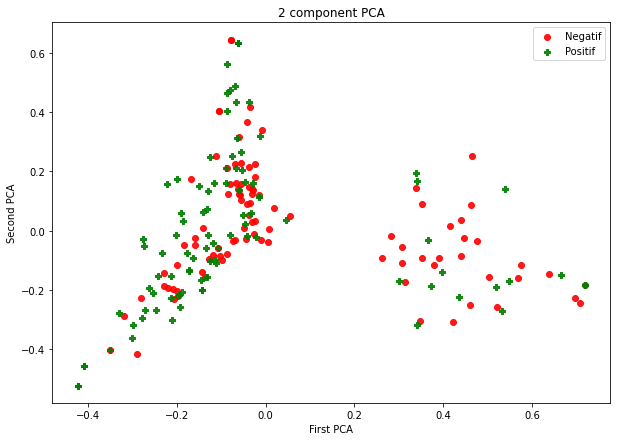

In [ ]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(1, 1, 1)
colors = ['r', 'g', 'b']
markers = ['o', 'P', 'v']
classes = np.sort(np.unique(train_label))
labels = ['Negatif', 'Positif']

for class_ix, marker, color, label in zip(classes, markers, colors, labels):
  ax.scatter(training_feature_pca_2Dsgdc[np.where(train_label == class_ix), 0],
             training_feature_pca_2Dsgdc[np.where(train_label == class_ix), 1],
             marker=marker, color=color,
             linewidth='1', alpha=0.9, label=label)
  ax.legend(loc='best')
plt.xlabel('First PCA')
plt.ylabel('Second PCA')
plt.title("2 component PCA")
plt.show()

In [ ]:
#SGDC = 83 dan 42
#LR = 84 dan 50
y_pred_sgdc_train_pca = classifier_sgdc.predict(vec_train_data7)
accuracy_sgdc_train_pca = accuracy_score(train_label, y_pred_sgdc_train_pca)
print("Accuracy Training set: ", accuracy_sgdc_train_pca)

y_pred_sgdc_test_pca = classifier_sgdc.predict(vec_test_data7)
accuracy_sgdc_test_pca = accuracy_score(test_label, y_pred_sgdc_test_pca)
print("Accuracy Test set: ", accuracy_sgdc_test_pca)

Accuracy Training set:  0.7037037037037037
Accuracy Test set:  0.5909090909090909


In [ ]:
recall_sgdc_train_pca = recall_score(train_label, y_pred_sgdc_train_pca)
print("Recall Training set: ", recall_sgdc_train_pca)

recall_sgdc_test_pca = recall_score(test_label, y_pred_sgdc_test_pca)
print("Recall Test set: ", recall_sgdc_test_pca)

Recall Training set:  0.5806451612903226
Recall Test set:  0.36363636363636365


In [ ]:
#hasil sgdv training : 94, testing : 76
precision_sgdc_train_pca = precision_score(train_label, y_pred_sgdc_train_pca)
print("Precision Training set: ", precision_sgdc_train_pca)

precision_sgdc_test_pca = precision_score(test_label, y_pred_sgdc_test_pca)
print("Precision Test set: ", precision_sgdc_test_pca)

Precision Training set:  0.7605633802816901
Precision Test set:  0.6666666666666666


In [ ]:
f1_sgdc_train_pca = f1_score(train_label, y_pred_sgdc_train_pca)
print("F1 Training set: ", f1_sgdc_train_pca)

f1_sgdc_test_pca = f1_score(test_label, y_pred_sgdc_test_pca, average='weighted')
print("F1 Test set: ", f1_sgdc_test_pca)

F1 Training set:  0.6585365853658537
F1 Test set:  0.5686274509803921


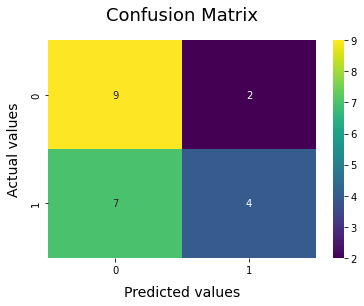

In [ ]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(test_label, y_pred_sgdc_test_pca), annot=True, cmap = 'viridis', fmt='.0f')
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
plt.show()

In [ ]:
training_feature_pca_2Dsgdc

array([[ 0.57441887, -0.11678794,  0.02195515, ...,  0.21126318,
        -0.0521855 , -0.03864492],
       [-0.02167159, -0.02244523,  0.18903337, ..., -0.07300616,
         0.41049095,  0.03169624],
       [-0.06147887,  0.63438883, -0.2881176 , ...,  0.01234331,
         0.014258  , -0.00240231],
       ...,
       [ 0.43508871, -0.22442231, -0.11997483, ..., -0.02710063,
        -0.0287196 ,  0.00418198],
       [-0.05572668,  0.15798408,  0.40853023, ..., -0.00499893,
        -0.05214162,  0.09654758],
       [ 0.31471181, -0.17233992, -0.03952767, ..., -0.14102062,
        -0.04100265, -0.17130396]])

In [ ]:
models = [        
          ('Linear SVM', accuracy_sgdc_train, accuracy_sgdc_test),
          ('Linear SVM PCA', accuracy_sgdc_train_pca, accuracy_sgdc_test_pca)
         ]

In [ ]:
predict_svm = pd.DataFrame(data = models, columns=['Model', 'Training Accuracy', 'Test Accuracy'])
predict_svm

,Model,Training Accuracy,Test Accuracy
0,Linear SVM,0.904762,0.863636
1,Linear SVM PCA,0.703704,0.590909


In [ ]:
models_total = [        
          ('Linear SVM', accuracy_sgdc_train, accuracy_sgdc_test),
          ('Linear SVM PCA', accuracy_sgdc_train_pca, accuracy_sgdc_test_pca),
          ('Logistic Regression', accuracy_lr_train, accuracy_lr_test),
          ('Logistic Regression PCA', accuracy_lr_train_pca, accuracy_lr_test_pca)
         ]

#Perbandingan Hasil Kedua Algoritma

Setelah dilakukan pemodelan dengan algoritma Logistik Regresi, Logistik Regresi + PCA, Linear SVM, dan Linear SVM + PCA didapatkan hasil akurasi seperti pada tabel di bawah dengan perbedaan yang cukup signifikan.

In [ ]:
predict_total = pd.DataFrame(data = models_total, columns=['Model', 'Training Accuracy', 'Test Accuracy'])
predict_total

,Model,Training Accuracy,Test Accuracy
0,Linear SVM,0.904762,0.863636
1,Linear SVM PCA,0.703704,0.590909
2,Logistic Regression,0.952381,0.863636
3,Logistic Regression PCA,0.724868,0.727273


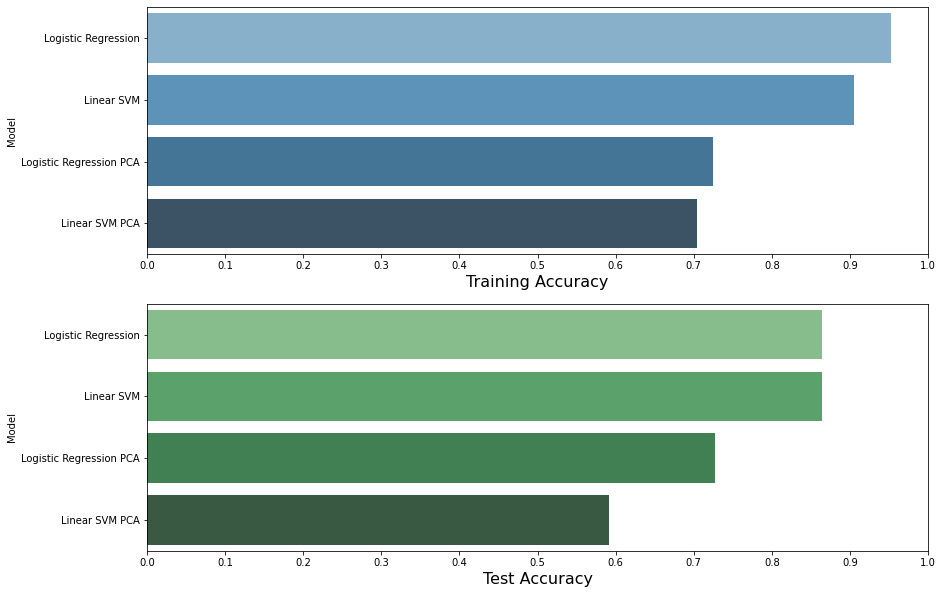

In [ ]:
import numpy as np

f, axes = plt.subplots(2,1, figsize=(14,10))

#Logistic Regression
predict_total.sort_values(by=['Training Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Training Accuracy', y='Model', data = predict_total, palette='Blues_d', ax = axes[0])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[0].set_xlabel('Training Accuracy', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))

predict_total.sort_values(by=['Test Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Test Accuracy', y='Model', data = predict_total, palette='Greens_d', ax = axes[1])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[1].set_xlabel('Test Accuracy', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))


plt.show()

Dapat disimpulkan bahwa algoritma Logistic Regression memiliki tingkat akurasi tertinggi dibanding algoritma maupun kombinasi teknik lain yang digunakan. Logistic Regression mendapat akurasi sebesar 95% untuk training dan 86% untuk testing. Sedangkan untuk kombinasi dengan menggunakan teknik PCA, didapat nilai akurasi tertinggi yaitu oleh Logistic Regression sebesar 72% untuk training dan 72% untuk testing. Maka pada studi kasus Text Klasifikasi Subsidi Kendaraan Listrik yang dilakukan untuk mendapatkan nilai akurasi optimal dengan reduksi dimensi yang memanfaatkan teknik PCA tidak cocok karena dengan menggunakan algoritma asli sendirinya pun sudah cukup untuk mengklasifikasikan text. Kekurangan pada penelitian ini yaitu hasil yang didapat masih cukup overfitting karena data training mendapat hasil akurasi 95% namun data testing hanya mendapat hasil akurasi sebesar 86%, sehingga kedua hasil akurasi tersebut kurang seimbang. 

Referensi :

[1] Widarsono, I. B. (2013). Cadangan dan produksi gas bumi nasional: sebuah analisis atas potensi dan tantangannya. Lembaran publikasi minyak dan gas bumi, 47(3), 115-126.

[2] Liun, E. (2018). Dampak Peralihan Massal Transportasi Jalan Raya Ke Mobil Listrik. Jurnal Pengembangan Energi Nuklir, 19(2), 113-122.

Travesset-Baro, O., Gallachóir, B. P., Jover, E., & Rosas-Casals, M. (2016). Transport energy demand in Andorra. Assessing private car futures through sensitivity and scenario analysis. Energy Policy, 96, 78-92.

[4] Chatterton, T., Anable, J., Cairns, S., & Wilson, R. E. (2018). Financial Implications of Car Ownership and Use: a distributional analysis based on observed spatial variance considering income and domestic energy costs. Transport Policy, 65, 30-39.

[5] Abas,  N.,  Kalair,  A., & Khan,  N.(2015).  Review  of Fossil  Fuels  and  Future  Energy Technologies. Futures, 69(May 2015), 31–49.

[6] Woo, J., Choi, H., & Ahn, J. (2017). Well-to-wheel analysis of greenhouse gas emissions for electric vehicles based on electricity generation mix: A global perspective. Transportation Research Part D: Transport and Environment, 51, 340-350.

[7] Mehar, S., Zeadally, S., Remy, G., & Senouci, S. M. (2014). Sustainable transportation management system for a fleet of electric vehicles. IEEE transactions on intelligent transportation systems, 16(3), 1401-1414.

[8] Isnain, A. R., Sakti, A. I., Alita, D., & Marga, N. S. (2021). Sentimen Analisis Publik Terhadap Kebijakan Lockdown Pemerintah Jakarta Menggunakan Algoritma Svm. Jurnal Data Mining Dan Sistem Informasi, 2(1), 31-37.

[9] Kelvin, K., Banjarnahor, J., Nababan, M. N., & Sinurat, S. H. (2022). Analisis perbandingan sentimen Corona Virus Disease-2019 (Covid19) pada Twitter Menggunakan Metode Logistic Regression Dan Support Vector Machine (SVM). Jurnal Sistem Informasi dan Ilmu Komputer Prima (JUSIKOM PRIMA), 5(2), 47-52.

[10] Nuha, U., & Rochmawati, N. (2020). Klasifikasi Kesahihan Hadits Berdasarkan Perawi Hadits Menggunakan Principal Component Analysis (PCA) dan Backpropagation Neural Network (BPNN). Journal of Informatics and Computer Science (JINACS), 1(3).

[11] Sianturi, M., Adiwijaya, A., & Faraby, S. (2017). Klasifikasi Dokumen Menggunakan Kombinasi Algoritma Principal Component Analysis Dan Svm. eProceedings of Engineering, 4(3).